In [17]:
from pymatgen.ext.matproj import MPRester
from pymatgen import Structure
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.bandstructure import PhononBandStructure
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np 


from pymatgen import Lattice, Structure, Molecule
with MPRester("kVModF0coZpRa7Ku") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961678")

    # Dos for material id
    dos = m.get_dos_by_material_id("mp-961678")

    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-961678")
    
    ph_band = m.get_phonon_bandstructure_by_material_id("mp-961678")

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



# Zones de Brillouin

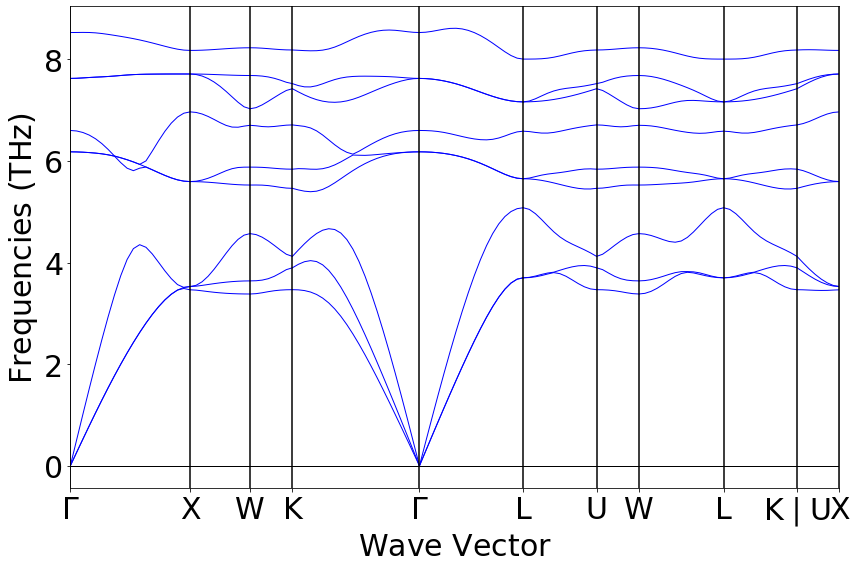

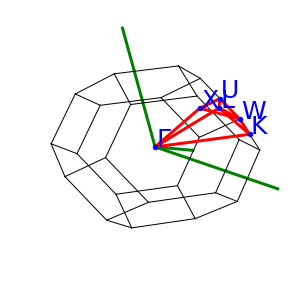

In [18]:

plot = PhononBSPlotter(ph_band)
plot.get_plot()
plot.plot_brillouin()
donnee = plot.bs_plot_data()

La vitesse de propagation de l'énergie vibratoire est donnée par l'équation V_g = dω/dq, et la vitesse du son dans un matériau dépend directement de cette vitesse.  On sait aussi que ω = 2(pi)f


# Vitesse du son dans trois zones de Brillouin

In [29]:
def vitesse(x,y):
    return 2*np.pi * abs(y)*10**2/abs(x)

In [38]:
dist = donnee.get("distances")
freq = donnee.get("frequency")
print("dist correspond à nos vecteurs q.")
print("freq correspond à nos frequences f. \n")


dist1 = dist[0]
freq1 = freq[0][0]
ord1 = freq1[-1] - freq1[0]
abs1 = dist1[-1] - dist1[0]
vit1 = vitesse(abs1,ord1)
print("La vitesse dans la première direction (Γ-X) vaut : ",vit1,"\n")

dist2 = dist[2]
freq2 = freq[2][1]
ord2 = freq2[-1] - freq2[0]
abs2 = dist2[-1] - dist2[0]
vit2 = vitesse(abs2,ord2)
print("La vitesse dans la deuxième direction (W-K) vaut : ",vit2,"\n")

dist3 = dist[3]
freq3 = freq[3][2]
ord3 = freq3[-1] - freq3[0]
abs3 = dist3[-1] - dist3[0]
vit3 = vitesse(abs3,ord3)
print("La vitesse dans la première direction (K-Γ) vaut : ",vit3,"\n")
print("Les trois branches choisies sont chacune différentes, ainsi que les zones de Brillouin.")




dist correspond à nos vecteurs q.
freq correspond à nos frequences f. 

La vitesse dans la première direction (Γ-X) vaut :  2071.172124752306 

La vitesse dans la deuxième direction (W-K) vaut :  436.04291696747873 

La vitesse dans la première direction (K-Γ) vaut :  2323.6451513198012 

Les trois branches choisies sont chacune différentes, ainsi que les zones de Brillouin.
